1. Разведочный анализ данных и визуализация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Загрузка датасета
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sleep_health_and_lifestyle_dataset.csv', sep =',')

In [4]:
# Вывод первых 5 строк датасета
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
# Проверка типов данных в датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
# Описательная статистика
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Подсчет количества уникальных значений для каждого признака
print(df.nunique())

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64


In [10]:
# Подсчет количества записей по каждому значению в признаке "Gender"
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

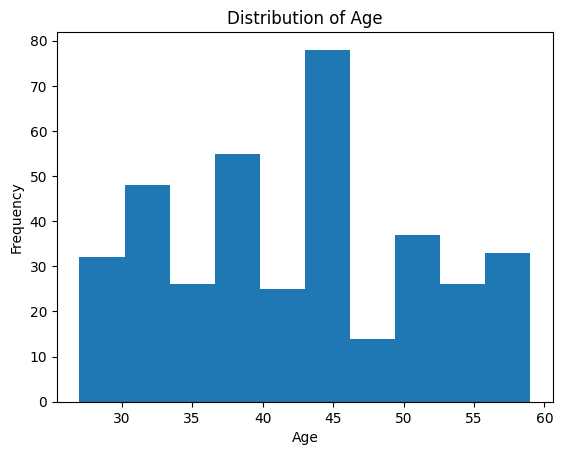

In [11]:
# Гистограмма распределения возрастов
df['Age'].plot(kind='hist')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


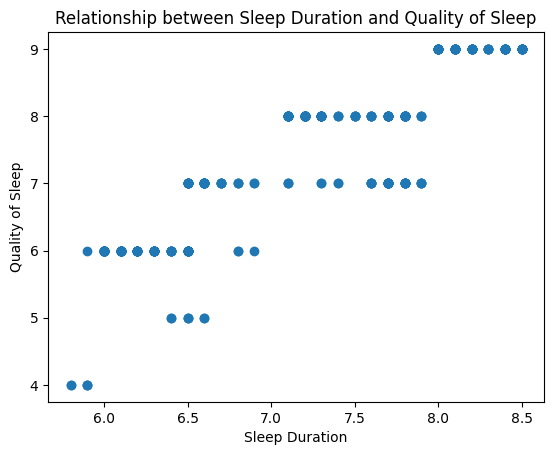

In [12]:
# Диаграмма рассеяния между признаками "Sleep Duration" и "Quality of Sleep"
plt.scatter(df['Sleep Duration'], df['Quality of Sleep'])
plt.title('Relationship between Sleep Duration and Quality of Sleep')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()


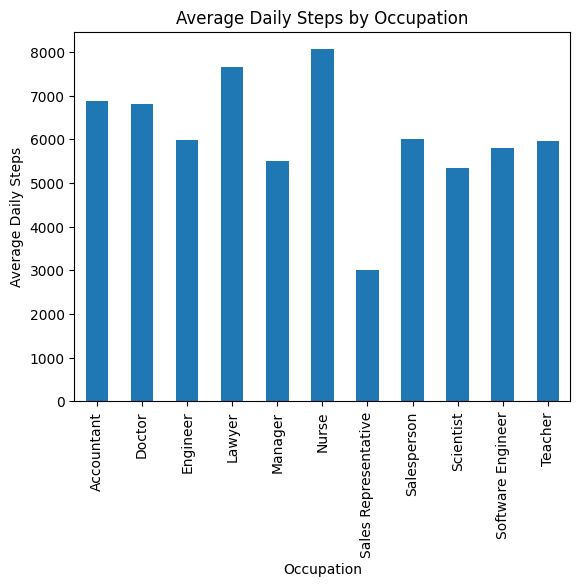

In [13]:
# Группировка данных по признаку "Occupation" и вычисление среднего значения признака "Daily Steps"
occupation_steps = df.groupby('Occupation')['Daily Steps'].mean()
occupation_steps.plot(kind='bar')
plt.title('Average Daily Steps by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Daily Steps')
plt.show()

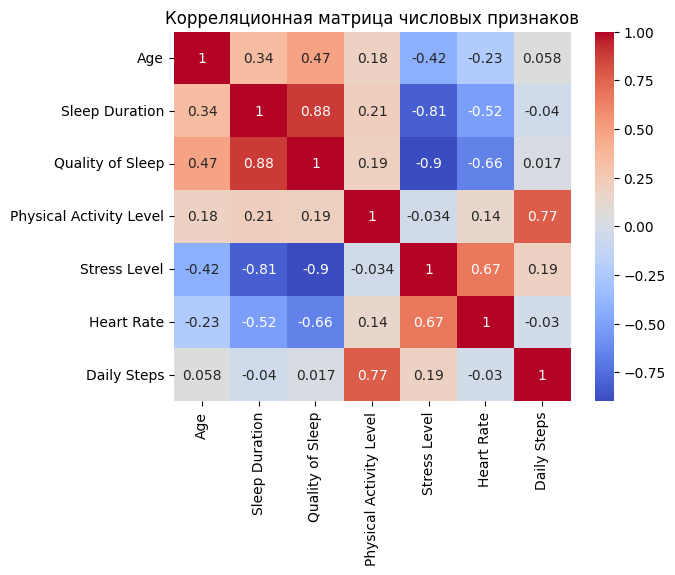

In [14]:
# Визуализация корреляционной матрицы для числовых признаков
numeric_features = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица числовых признаков")
plt.show()

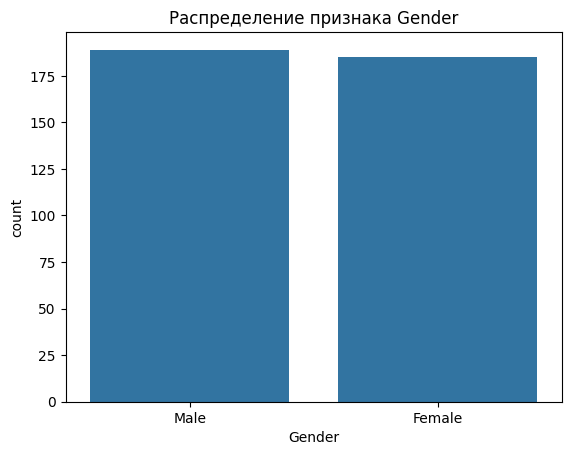

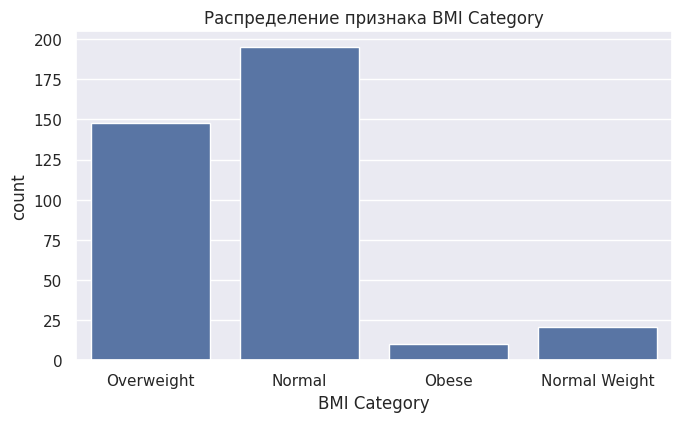

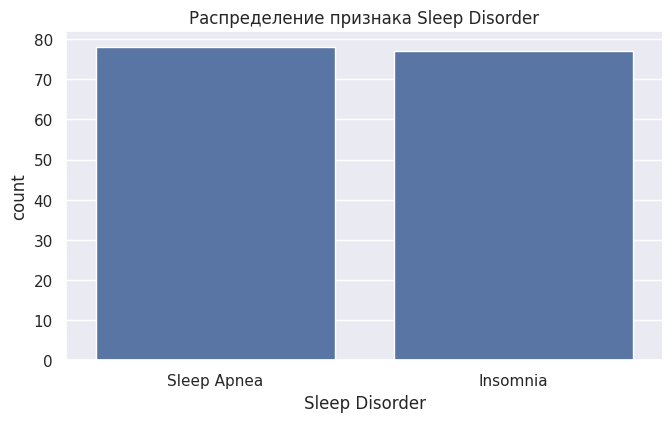

In [15]:
# Визуализация категориальных признаков
categorical_features = ["Gender","BMI Category", "Sleep Disorder"]
for feature in categorical_features:
    sns.countplot(data=df, x=feature)
    sns.set_theme(rc={'figure.figsize':(7.7, 4.27)})
    plt.title(f"Распределение признака {feature}")
    plt.show()

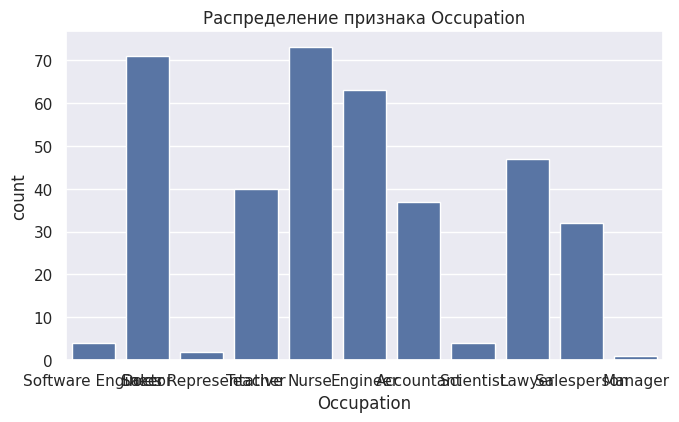

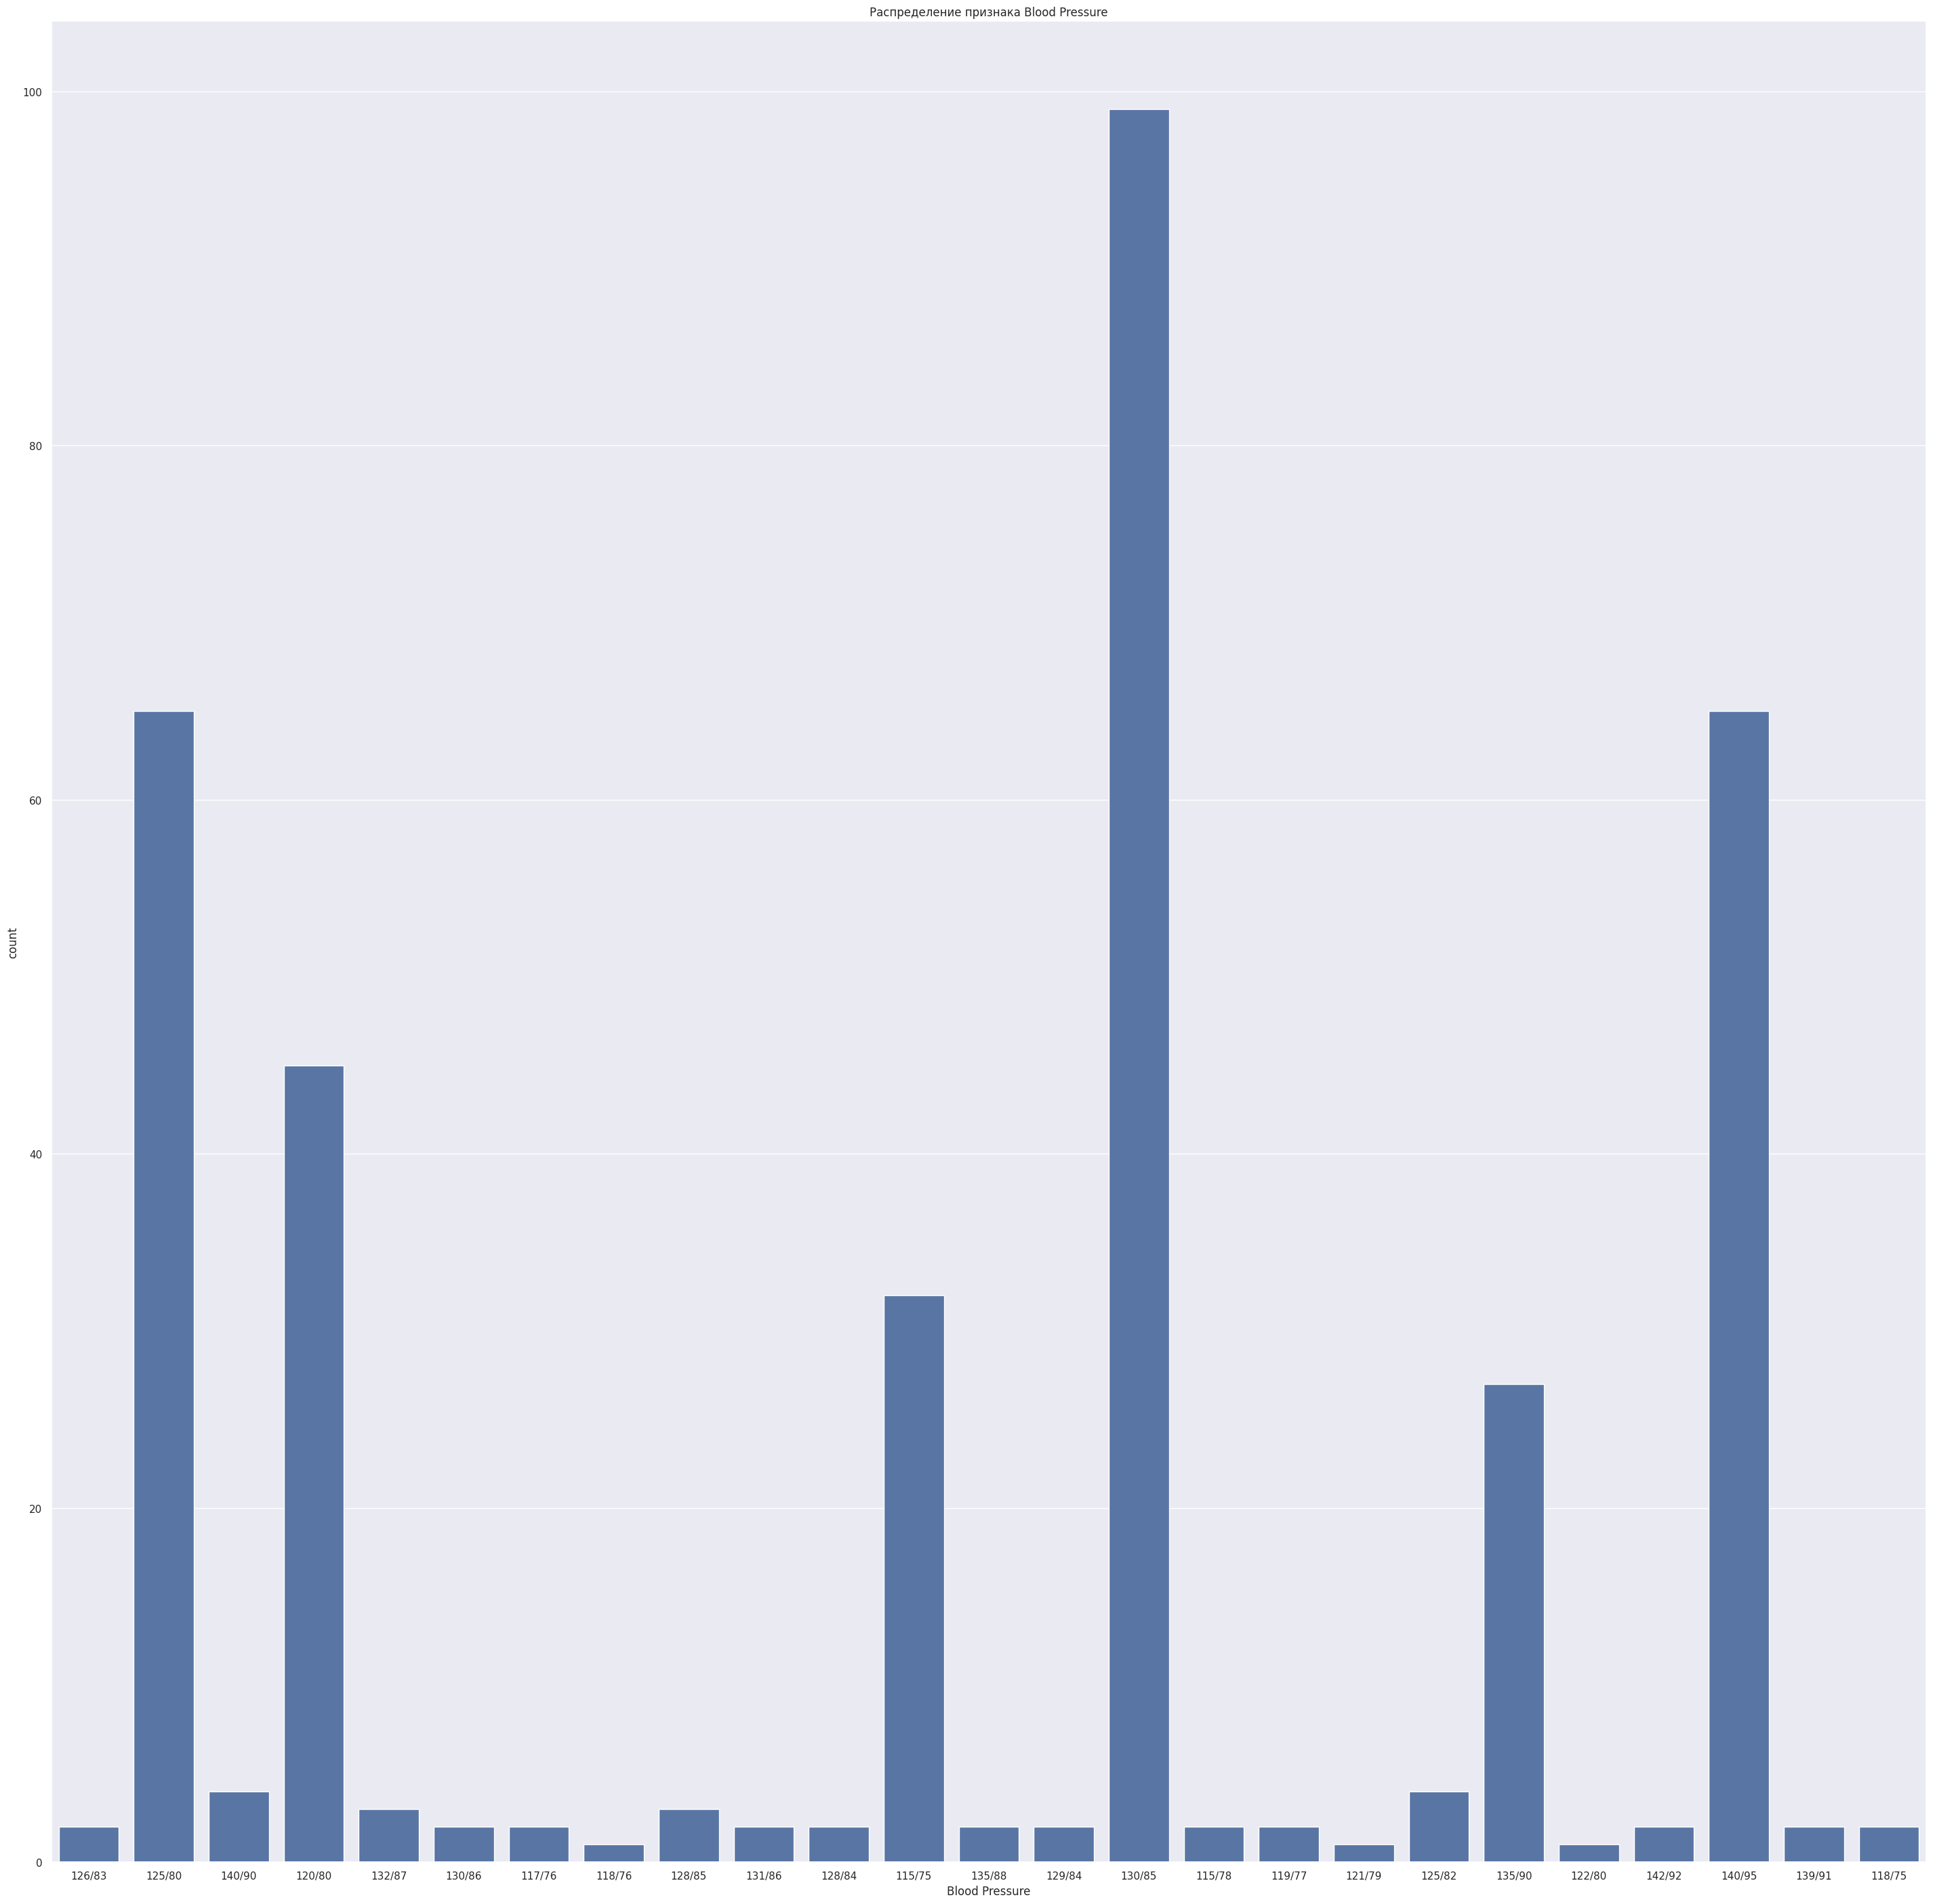

In [16]:
# Визуализация категориальных признаков
categorical_features = ["Occupation", "Blood Pressure"]
for feature in categorical_features:
    sns.countplot(data=df, x=feature)
    sns.set_theme(rc={'figure.figsize':(35.7,35.27)})
    plt.title(f"Распределение признака {feature}")
    plt.show()

2. Обработка признаков

In [17]:
# Импортируем необходимые библиотеки
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [18]:
label_encoder=LabelEncoder()

In [19]:
cat_cols=['Gender','Occupation','BMI Category','Sleep Disorder']
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.tail(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
372,373,0,59,5,8.1,9,75,3,3,140/95,68,7000,1
373,374,0,59,5,8.1,9,75,3,3,140/95,68,7000,1


In [20]:
df.drop('Person ID', axis=1, inplace=True)

In [21]:
stress_level_index = df.columns.get_loc('Stress Level')

columns = list(df.columns[:stress_level_index]) + list(df.columns[stress_level_index+1:]) + ['Stress Level']

stress = df[columns]
stress.tail(1)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Stress Level
373,0,59,5,8.1,9,75,3,140/95,68,7000,1,3


In [22]:
stress['Occupation'].unique()

array([ 9,  1,  6, 10,  5,  2,  0,  8,  3,  7,  4])

In [23]:
stress[['Systolic BP', 'Diastolic BP']] = stress['Blood Pressure'].str.split('/', expand=True)

# Преобразовать новые столбцы в числовой тип
stress[['Systolic BP', 'Diastolic BP']] = stress[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)

# Удаляем исходную колонку "Blood Pressure".
stress = stress.drop('Blood Pressure', axis=1)

stress.head(1)

<ipython-input-23-4b046c5a7c27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stress[['Systolic BP', 'Diastolic BP']] = stress['Blood Pressure'].str.split('/', expand=True)
<ipython-input-23-4b046c5a7c27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stress[['Systolic BP', 'Diastolic BP']] = stress['Blood Pressure'].str.split('/', expand=True)
<ipython-input-23-4b046c5a7c27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Stress Level,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,3,77,4200,2,6,126,83


3. Обучение моделей

In [24]:
# Импортируем необходимые библиотеки
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [25]:
# Разделяем данные на признаки (X) и целевую переменную (y)
X = stress.drop('Stress Level', axis=1)
y = stress['Stress Level']

In [26]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

In [28]:
rf_classification_report = classification_report(y_test, rf_predictions)
print(rf_classification_report)


              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        17

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [29]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
lr_classification_report = classification_report(y_test, lr_predictions)
print(lr_classification_report)

              precision    recall  f1-score   support

           3       0.92      1.00      0.96        12
           4       0.50      0.70      0.58        10
           5       0.75      0.43      0.55        14
           6       0.89      0.80      0.84        10
           7       0.85      0.92      0.88        12
           8       0.56      0.59      0.57        17

    accuracy                           0.72        75
   macro avg       0.74      0.74      0.73        75
weighted avg       0.73      0.72      0.72        75



In [31]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

In [32]:
svm_classification_report = classification_report(y_test, svm_predictions)
print(svm_classification_report )

              precision    recall  f1-score   support

           3       0.27      0.50      0.35        12
           4       0.32      0.90      0.47        10
           5       0.55      0.79      0.65        14
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        12
           8       1.00      0.29      0.45        17

    accuracy                           0.41        75
   macro avg       0.36      0.41      0.32        75
weighted avg       0.42      0.41      0.34        75



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Кластеризация

In [33]:
# Выделение нужных признаков
features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Systolic BP','Diastolic BP', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
X = stress[features]

# Преобразование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_scaled)
agg_labels = agg.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
dbscan_labels = dbscan.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
kmeans_silhouette_score = silhouette_score(X_scaled, kmeans_labels)
agg_silhouette_score = silhouette_score(X_scaled, agg_labels)
dbscan_silhouette_score = silhouette_score(X_scaled, dbscan_labels)

print('K-means silhouette score:', kmeans_silhouette_score)
print('Agglomerative Clustering silhouette score:', agg_silhouette_score)
print('DBSCAN silhouette score:', dbscan_silhouette_score)

K-means silhouette score: 0.3692890936446241
Agglomerative Clustering silhouette score: 0.36055183757850584
DBSCAN silhouette score: 0.6248199436434422


In [36]:
print('K-means')
print('Number of clusters:', len(set(kmeans_labels)))
print('Cluster labels:', kmeans_labels)
print('K-means silhouette score:', kmeans_silhouette_score)

K-means
Number of clusters: 3
Cluster labels: [0 0 0 0 0 0 0 2 2 2 0 2 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0
 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
K-means silhouette score: 0.3692890936446241


In [37]:
print('Agglomerative Clustering')
print('Number of clusters:', len(set(agg_labels)))
print('Cluster labels:', agg_labels)
print('Agglomerative Clustering silhouette score:', agg_silhouette_score)

Agglomerative Clustering
Number of clusters: 3
Cluster labels: [0 0 0 0 0 0 0 2 2 2 0 2 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Agglomerative Clustering silhouette score: 0.36055183757850584


In [38]:
print('DBSCAN')
print('Number of clusters:', len(set(dbscan_labels)))
print('Cluster labels:', dbscan_labels)
print('DBSCAN silhouette score:', dbscan_silhouette_score)

DBSCAN
Number of clusters: 14
Cluster labels: [-1 -1 -1 -1 -1 -1 -1  0  0  0  1  0  1  1  1  1 -1 -1 -1  0  0  0  0  0
  0  0  0  0  0  0 -1 -1 -1  2  0  2  2  0  0  0  0  0  0  0  0  0  0  0
  0 -1 -1 -1  2  0  2  2  0  2  2  0  2  2  2  2  2  2 -1 -1 -1 -1  2  2
  2  2  2  2  2  2  2  2 -1 -1 -1 -1 -1  3  4  4  4  4  4  4 -1 -1 -1  3
  3  3  3  3  3  3  3 -1 -1 -1 -1 -1 -1  5  3  5  3  5  3  3  3  3  3  3
  3  3  3  3  3 -1  5  3  5  5  3  5  5  3  5  5  3  5  3  5  3  5  3  3
 -1 -1 -1 -1 -1 -1 -1  5  5  5  5  5  5  5  5  5  5 -1 -1 -1 -1 -1 -1 -1
 -1  6  6  6  6  6  6  6  6  7  6  6  6  6  6  6 -1 -1  8  7  8  7  8  7
  7  7  7  7  7  7  7  7  7 -1 -1 -1 -1  6  6  6  6  6  6  6  6  6  6  6
  6  6 -1 -1  8  7  7  7  8  7  8  7  8  7  8  7  8  7  8  7  7  8  7  7
  8  7  7  8  7  8  7 -1 -1 -1 -1 -1  8  8  8  8  8  8  8  8  8 -1 -1 -1
 -1  9 -1 -1  9  9  9  9  9  9  9  9 -1 -1 -1 10 -1  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9 10 10 10 10 -1  9  9  9 11 11 11 11 11 11
 10 1